# Test Data Pipeline

Versimpelde notebook om de data module te testen.


In [1]:
import sys
sys.path.insert(0, "..")

from src.data import load_flowers_data, get_device, IMG_SIZE, NUM_CLASSES
from loguru import logger


## Device check


In [2]:
device = get_device()
logger.info(f"Device: {device}")
logger.info(f"Image size: {IMG_SIZE}")
logger.info(f"Aantal klassen: {NUM_CLASSES}")


2025-12-29 16:10:10.148 | INFO     | __main__:<module>:2 - Device: cuda
2025-12-29 16:10:10.148 | INFO     | __main__:<module>:3 - Image size: 128
2025-12-29 16:10:10.148 | INFO     | __main__:<module>:4 - Aantal klassen: 5


## Data laden


In [3]:
train, valid = load_flowers_data()


2025-12-29 16:10:21.618 | INFO     | mads_datasets.base:download_data:121 - Folder already exists at C:\Users\NvanOort\.cache\mads_datasets\flowers
2025-12-29 16:10:34.677 | INFO     | src.data:load_flowers_data:59 - Train batches: 91, Valid batches: 22


## Test batch


In [4]:
import torch

X, y = next(train.stream())
logger.info(f"X shape: {X.shape}")
logger.info(f"y shape: {y.shape}")
logger.info(f"Unieke labels: {torch.unique(y)}")


2025-12-29 16:10:45.516 | INFO     | __main__:<module>:4 - X shape: torch.Size([32, 3, 128, 128])
2025-12-29 16:10:45.517 | INFO     | __main__:<module>:5 - y shape: torch.Size([32])
2025-12-29 16:10:45.521 | INFO     | __main__:<module>:6 - Unieke labels: tensor([0, 1, 2, 3, 4])


## Visualiseer batch


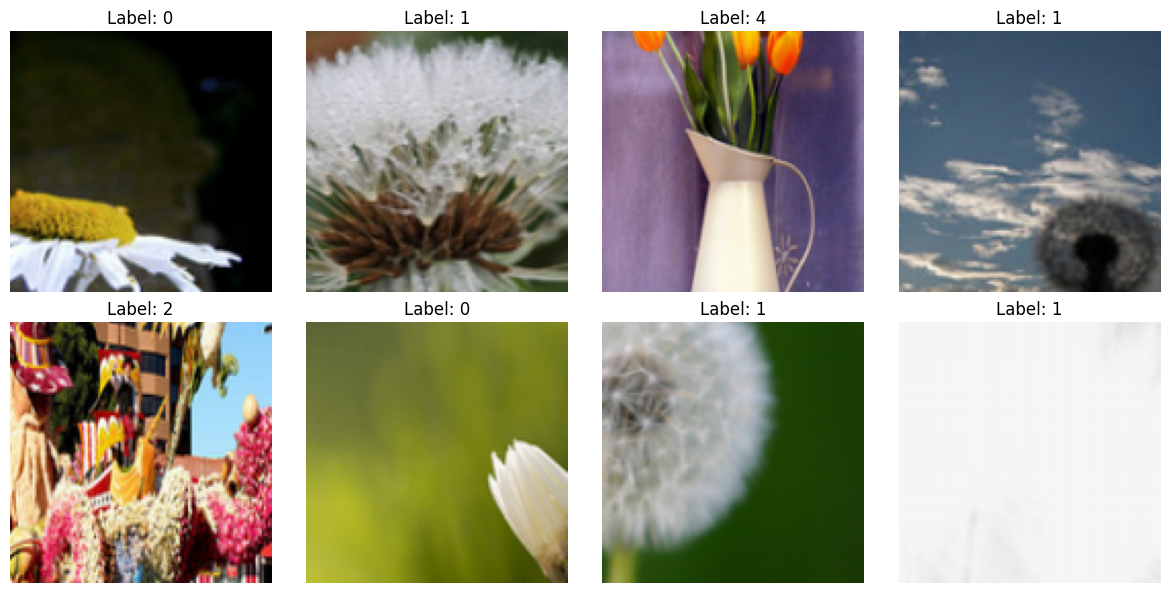

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Denormaliseer voor visualisatie
img = X.permute(0, 2, 3, 1).numpy()
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
img = std * img + mean
img = np.clip(img, 0, 1)

# Plot
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.ravel()
for i in range(8):
    axs[i].imshow(img[i])
    axs[i].set_title(f"Label: {y[i].item()}")
    axs[i].axis("off")
plt.tight_layout()
plt.show()


## Data pipeline gereed!

De data module werkt correct. Je kunt deze nu importeren in andere scripts.
